In [1]:
# Design model
# construct loss and optimizer
# Training loop

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
# Prepare data

X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(y_numpy.astype(np.float32))

In [4]:
Y.shape

torch.Size([100])

In [9]:
Y = Y.view(Y.shape[0], 1)
Y.shape

torch.Size([100, 1])

In [10]:
n_samples, n_features = X.shape

In [11]:
# Build the model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [12]:
# Loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [14]:
# Training Loop

num_epochs = 100

for epoch in range(num_epochs):
    # Forward pass
    
    y_predicted = model(X)
    
    # loss
    loss = criterion(y_predicted, Y)
    
    #backward pass
    loss.backward() #caclulate the gradients
    
    #update
    
    optimizer.step()
    
    # Now we need to empty our gradients
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 4467.8950
epoch: 20, loss = 3332.7693
epoch: 30, loss = 2511.1125
epoch: 40, loss = 1915.7417
epoch: 50, loss = 1483.9233
epoch: 60, loss = 1170.4498
epoch: 70, loss = 942.7015
epoch: 80, loss = 777.1105
epoch: 90, loss = 656.6293
epoch: 100, loss = 568.9138


In [18]:
# make plots

predicted = model(X).detach() # Detach prevents it from being tracked in computational graph 
predicted.shape

torch.Size([100, 1])

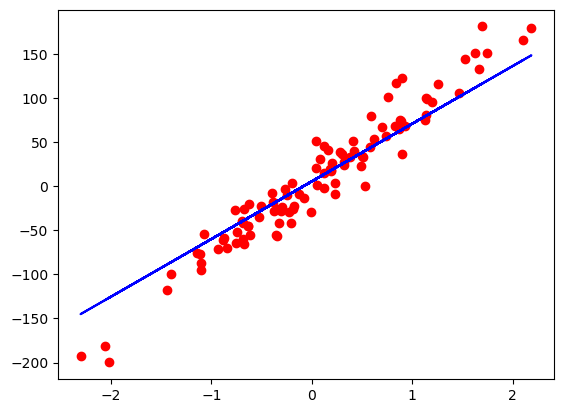

In [19]:
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

In [ ]:
# Now we see that there is a pretty good approximation of our generated data set.